# Lab 3: Continuous Data

<img src="https://images.freeimages.com/images/large-previews/bc2/wine-1328360.jpg" width="500"/>

Today, everything is all about wine. The dataset we are using today, is full of continous, numeric data. Let's explore the dataset!


## TASK 1: Exploration and Initial Analysis


### Data Collection
Read the file [``winedata.csv``](https://raw.githubusercontent.com/ADSLab-Salzburg/DataAnalysiswithPython/main/data/winedata.csv), which is a dataset listing the features of several different wines (e.g. alchol level, acids etc.), for an exploratory data analysis.

In [110]:
# YOUR CODE HERE
#raise NotImplementedError()
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
df = pd.read_csv('https://raw.githubusercontent.com/ADSLab-Salzburg/DataAnalysiswithPython/main/data/winedata.csv')

In [111]:
# Ignore this cell - this is for automatic grading.

### Data Exploration

Print the first lines of the dataset and examine it. (``head()``, ``describe()``). Is there a feature that contains invalid values? If yes, which?

In [112]:
# YOUR CODE HERE
#raise NotImplementedError()
df.head()
df.describe()

,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280315,Proline
count,178.000000,178.000000,173.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.362659,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.276332,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.550000,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


Dynamically create a Python list, that contains the column names of the features that contain invalid values. Store it to the variable `colums_containing_nan`.

In [113]:
# YOUR CODE HERE
#raise NotImplementedError()
colums_containing_nan = list(df.loc[:,df.isnull().any()==True].columns)


In [114]:
# Ignore this cell - this is for automatic grading.

### Data Preprocessing
Clean the dataset using appropriate methods. See Lecture 5 for some approaches. Do this inplace on DataFrame `df`.

In [115]:
# YOUR CODE HERE
#raise NotImplementedError()
for name in colums_containing_nan:
    df.loc[df[name].isna(), name] = df[name].mean()

test = list(df.loc[:,df.isnull().any()==True].columns)

[]

In [116]:
# Ignore this cell - this is for automatic grading.

Elaborate on why you exactly choosed this method to clean the dataset? Max. three sentences!

<span style="color:red">YOUR ANSWER HERE</span>

### Data Visualization

Draw a seaborn boxplot of each feature (=column) in a single plot.

<AxesSubplot:>

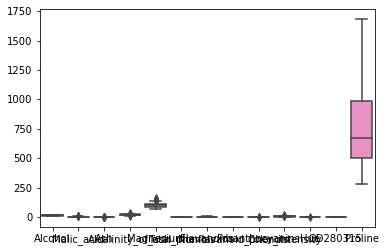

In [117]:
# YOUR CODE HERE
# raise NotImplementedError()
import matplotlib.pyplot as plt
import seaborn as sns
sns.boxplot(data=df)


## TASK 2: Normalization of Data

As the proline feature has a different scale, we want to standardize all features to have zero mean and standard variance. Use the [``StandardScaler()``](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) from sklearn as an easy way to achieve this.

### Data processing
Normalize the data using ``StandardScaler()``. Store the normalized data to a DataFrame called `df_s`.

In [118]:
# YOUR CODE HERE
# raise NotImplementedError()
from sklearn.preprocessing import StandardScaler
s = StandardScaler()
data = s.fit_transform(df)
df_s = pd.DataFrame(data,columns=df.columns)

In [119]:
# Ignore this cell - this is for automatic grading.

### Data Visualization

Visualize the transformed data.

<AxesSubplot:>

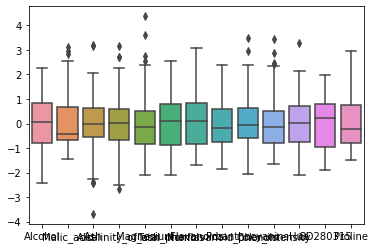

In [120]:
# YOUR CODE HERE
# raise NotImplementedError()
sns.boxplot(data=df_s)


## TASK 3: Dimension Reduction

In order to observe similarities between all data points (= wines), we can draw them in a two-dimensional space: However, we first need a dimensionality reduction - to reduce the currently 13 features. [``TSNE``](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html?highlight=tsne) is a well known and state-of-the-art method for reducing the dimensionality of the data. The idea is to best preserve the distance between data points also in 2D.

### Dimension Reduction using TSNE

Instantiate a TSNE object with meaningful parameters (set the number of target dimensions to $2$), transform scaled data into a two dimensional space, and store it in a DataFrame named `df_d`.

In [121]:
# YOUR CODE HERE
# raise NotImplementedError()
from sklearn.manifold import TSNE
t = TSNE(learning_rate=1000, min_grad_norm=1e-10,n_iter=1000000)
df_d = t.fit_transform(df_s)
df_d = pd.DataFrame(df_d,columns=["Feature 1","Feature 2"])

/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


In [122]:
# Ignore this cell - this is for automatic grading.

### Data Visualization
Use seaborn to plot the data in a scatterplot.

<AxesSubplot:>

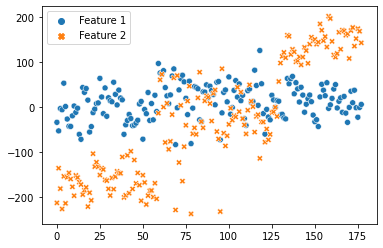

In [123]:
# YOUR CODE HERE
# raise NotImplementedError()
sns.scatterplot(data=df_d)

## TASK 4
Load the ``winelabels.csv`` which indicate the vineyard that produced the wines (numbers from 0 to 2). Use this to "label" the points in the scatterplot with one color per vineyard. Add a legend.

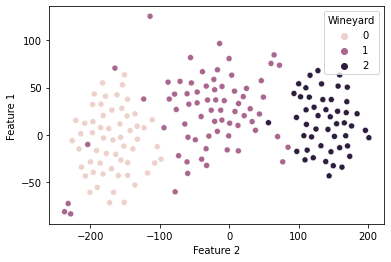

In [124]:
# YOUR CODE HERE
df_lab = pd.read_csv('https://raw.githubusercontent.com/ADSLab-Salzburg/DataAnalysiswithPython/main/data/winelabels.csv')
df_lab.head
df_fi = df_lab.join(df_d)
df_fi.rename(columns={"0":"Wineyard"},inplace=True)
df_fi.head
sns.scatterplot(data=df_fi, y='Feature 1', x='Feature 2',hue='Wineyard')
plt.show()
# df_final = pd.DataFrame(data=df_fi,columns=["Wineyard","Feature 1","Feature 2"])
# df_final.head
